In [1]:
import nltk

In [2]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

### Load Data

In [5]:
import json
with open('nv_leg_nram.json', 'r') as file:
    data = json.load(file)

In [6]:
type(data)

dict

In [7]:
raw = json.dumps(data) # convert json to string

In [8]:
type(raw)

str

### Counting

In [9]:
length = len(raw) # the length of the text including punctuation

In [10]:
len(set(raw)) # number of distinct words

82

In [11]:
def lexical_diversity(text):
    '''the number of distinct words / the total number of words'''
    return len(set(text)) / len(text)

In [12]:
lexical_diversity(raw)

0.0004281581887864326

In [13]:
def percentage(count, total):
    '''count how often a word occurs in a text'''
    return 100 * count / total

In [14]:
percentage(raw.count('the'), length) # count the frequency of 'the'

1.0166146263014442

## Processing Raw Text

### Tokenization

Break up the string into words and punctuation, and create a list of words and punctuation.

In [15]:
from nltk import word_tokenize

In [16]:
text = [word.lower() for word in word_tokenize(raw)]

In [17]:
type(text)

list

### Stopwords

Stopwords are non-content words that primarily has only grammatical function

In [18]:
from nltk.corpus import stopwords

In [19]:
stopwords_en = set(stopwords.words('english')) # set checking is faster than list
print(stopwords_en)

{'having', 'few', 'than', 'the', 've', "didn't", "weren't", 'own', 'into', 'more', 'our', 'have', 'ourselves', 'are', 'can', "wouldn't", "hasn't", "wasn't", 'or', 'what', 'off', 'his', 'a', 'then', 'does', 'been', 'some', 'couldn', 'by', 'you', 'themselves', "mightn't", 'they', 'wouldn', 'her', 'out', 'just', 'how', 'while', 'won', 'was', 'weren', 'because', 'only', 'with', 'hadn', 'other', 'why', 'will', 'y', 'after', 'and', 'its', 'down', 'has', 'didn', 's', 'before', 'shan', 'that', 'too', 'ours', 'hers', 'am', 'd', 'where', 'against', "aren't", "haven't", 'don', 'ain', "couldn't", "shouldn't", 'to', 'myself', "don't", 'but', 'he', 'these', 'until', 'up', 'on', 'll', 'about', "that'll", 'there', 'through', 'aren', 'my', 'their', 'any', 'under', 'those', 'we', 'most', 'him', "mustn't", 'isn', 'be', 'not', 'mightn', 'mustn', 'both', 'same', "needn't", 'now', 'above', 'o', 'shouldn', 'when', 'which', 'is', 'who', 'yourselves', 'during', 'had', 'nor', 'm', 'wasn', 'further', 'such', 'do

Ofen, we want to remove stopwords when we want to capture only the gist of the documemt

In [20]:
text_no_stopwords = [word for word in text if word not in stopwords_en]

Often, we want to remove the punctuations from the documents too.

In [21]:
from string import punctuation
print('From string.punctuation:', type(punctuation), punctuation)

From string.punctuation: <class 'str'> !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [22]:
text_no_stopwords_punc = [word for word in text_no_stopwords if word not in punctuation]

### Lemmatization
Trying to find the root word with linguistics rules (with the use of regexes)

In [23]:
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer

In [24]:
wnl = WordNetLemmatizer()

def penn2morphy(penntag):
    """ Converts Penn Treebank tags to WordNet. """
    morphy_tag = {'NN':'n', 'JJ':'a',
                  'VB':'v', 'RB':'r'}
    try:
        return morphy_tag[penntag[:2]]
    except:
        return 'n' 
    
def lemmatize_sent(text): 
    return [wnl.lemmatize(word.lower(), pos=penn2morphy(tag)) 
            for word, tag in pos_tag(text)]

In [25]:
lemmatize_sent(text_no_stopwords_punc)

['``',
 '0',
 "''",
 '``',
 '\\nminutes',
 'meet',
 '\\nof',
 '\\nassembly',
 'committee',
 'education',
 '\\n',
 '\\nseventy-eighth',
 'session',
 '\\nfebruary',
 '23',
 '2015',
 '\\n',
 '\\nthe',
 'committee',
 'education',
 'call',
 'order',
 'vice',
 'chair',
 'lynn',
 'd.',
 'stewart',
 '\\nat',
 '3:15',
 'p.m.',
 'monday',
 'february',
 '23',
 '2015',
 'room',
 '3142',
 '\\nlegislative',
 'build',
 '401',
 'south',
 'carson',
 'street',
 'carson',
 'city',
 'nevada',
 '\\nmeeting',
 'videoconferenced',
 'room',
 '4406',
 'grant',
 'sawyer',
 'state',
 'office',
 '\\nbuilding',
 '555',
 'east',
 'washington',
 'avenue',
 'la',
 'vega',
 'nevada',
 'copy',
 '\\nminutes',
 'include',
 'agenda',
 'exhibit',
 'attendance',
 'roster',
 'exhibit',
 'b',
 '\\nand',
 'substantive',
 'exhibit',
 'available',
 'file',
 'research',
 'library',
 '\\nof',
 'legislative',
 'counsel',
 'bureau',
 'nevada',
 'legislature',
 "'s",
 'website',
 '\\nwww.leg.state.nv.us/app/nelis/rel/78th2015',
 'add

In [26]:
nltk.pos_tag(text)

[('{', '('),
 ('``', '``'),
 ('0', 'CD'),
 ("''", "''"),
 (':', ':'),
 ('``', '``'),
 ('\\nminutes', 'NNS'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('meeting', 'NN'),
 ('\\nof', 'VBD'),
 ('the', 'DT'),
 ('\\nassembly', 'NNP'),
 ('committee', 'NN'),
 ('on', 'IN'),
 ('education', 'NN'),
 ('\\n', 'NNP'),
 ('\\nseventy-eighth', 'JJ'),
 ('session', 'NN'),
 ('\\nfebruary', 'JJ'),
 ('23', 'CD'),
 (',', ','),
 ('2015', 'CD'),
 ('\\n', 'SYM'),
 ('\\nthe', 'NNP'),
 ('committee', 'NN'),
 ('on', 'IN'),
 ('education', 'NN'),
 ('was', 'VBD'),
 ('called', 'VBN'),
 ('to', 'TO'),
 ('order', 'NN'),
 ('by', 'IN'),
 ('vice', 'NN'),
 ('chair', 'NN'),
 ('lynn', 'JJ'),
 ('d.', 'JJ'),
 ('stewart', 'NN'),
 ('\\nat', 'VBZ'),
 ('3:15', 'CD'),
 ('p.m.', 'NN'),
 ('on', 'IN'),
 ('monday', 'NN'),
 (',', ','),
 ('february', 'JJ'),
 ('23', 'CD'),
 (',', ','),
 ('2015', 'CD'),
 (',', ','),
 ('in', 'IN'),
 ('room', 'NN'),
 ('3142', 'CD'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('\\nlegislative', 'JJ'),
 ('building', 'NN'),
 (',', ','

### Remove the line breaks

In [27]:
len(text_no_stopwords_punc)

17286

In [28]:
text_no_stopwords_punc_lb = [word for word in text_no_stopwords_punc if not word.startswith('\\n')]+[word[2:] for word in text_no_stopwords_punc if  word.startswith('\\n')]

In [29]:
len(text_no_stopwords_punc_lb)

17286

In [30]:
nltk.pos_tag(text_no_stopwords_punc_lb)

[('``', '``'),
 ('0', 'CD'),
 ("''", "''"),
 ('``', '``'),
 ('meeting', 'NN'),
 ('committee', 'NN'),
 ('education', 'NN'),
 ('session', 'NN'),
 ('23', 'CD'),
 ('2015', 'CD'),
 ('committee', 'NN'),
 ('education', 'NN'),
 ('called', 'VBN'),
 ('order', 'NN'),
 ('vice', 'NN'),
 ('chair', 'NN'),
 ('lynn', 'JJ'),
 ('d.', 'JJ'),
 ('stewart', 'NN'),
 ('3:15', 'CD'),
 ('p.m.', 'NN'),
 ('monday', 'NN'),
 ('february', 'JJ'),
 ('23', 'CD'),
 ('2015', 'CD'),
 ('room', 'NN'),
 ('3142', 'CD'),
 ('building', 'NN'),
 ('401', 'CD'),
 ('south', 'NN'),
 ('carson', 'JJ'),
 ('street', 'NN'),
 ('carson', 'JJ'),
 ('city', 'NN'),
 ('nevada', 'NN'),
 ('videoconferenced', 'VBD'),
 ('room', 'NN'),
 ('4406', 'CD'),
 ('grant', 'NN'),
 ('sawyer', 'NN'),
 ('state', 'NN'),
 ('office', 'NN'),
 ('555', 'CD'),
 ('east', 'IN'),
 ('washington', 'NN'),
 ('avenue', 'NN'),
 ('las', 'NN'),
 ('vegas', 'IN'),
 ('nevada', 'JJ'),
 ('copies', 'NNS'),
 ('including', 'VBG'),
 ('agenda', 'JJ'),
 ('exhibit', 'NN'),
 ('attendance', 'NN'

### Frequency Distribution

In [34]:
text_no_stopwords_punc_lb_lemma=lemmatize_sent(text_no_stopwords_punc_lb)

In [35]:
nltk.pos_tag(text_no_stopwords_punc_lb_lemma)

[('``', '``'),
 ('0', 'CD'),
 ("''", "''"),
 ('``', '``'),
 ('meeting', 'NN'),
 ('committee', 'NN'),
 ('education', 'NN'),
 ('session', 'NN'),
 ('23', 'CD'),
 ('2015', 'CD'),
 ('committee', 'NN'),
 ('education', 'NN'),
 ('call', 'NN'),
 ('order', 'NN'),
 ('vice', 'NN'),
 ('chair', 'NN'),
 ('lynn', 'JJ'),
 ('d.', 'JJ'),
 ('stewart', 'NN'),
 ('3:15', 'CD'),
 ('p.m.', 'NN'),
 ('monday', 'NN'),
 ('february', 'JJ'),
 ('23', 'CD'),
 ('2015', 'CD'),
 ('room', 'NN'),
 ('3142', 'CD'),
 ('building', 'NN'),
 ('401', 'CD'),
 ('south', 'NN'),
 ('carson', 'JJ'),
 ('street', 'NN'),
 ('carson', 'JJ'),
 ('city', 'NN'),
 ('nevada', 'NN'),
 ('videoconferenced', 'VBD'),
 ('room', 'NN'),
 ('4406', 'CD'),
 ('grant', 'NN'),
 ('sawyer', 'NN'),
 ('state', 'NN'),
 ('office', 'NN'),
 ('555', 'CD'),
 ('east', 'IN'),
 ('washington', 'NN'),
 ('avenue', 'NN'),
 ('la', 'NN'),
 ('vega', 'FW'),
 ('nevada', 'JJ'),
 ('copy', 'NN'),
 ('include', 'VBP'),
 ('agenda', 'JJ'),
 ('exhibit', 'NN'),
 ('attendance', 'NN'),
 ('rost

##### Erase the md

In [36]:
leg=nltk.pos_tag(text_no_stopwords_punc_lb_lemma)

In [40]:
text_no_stopwords_punc_lb_lemma_md=[word for word in text_no_stopwords_punc_lb_lemma if (word,'MD') not in leg]

In [41]:
from nltk.probability import FreqDist
textdist = FreqDist(text_no_stopwords_punc_lb_lemma_md)
print(textdist)

<FreqDist with 2702 samples and 16341 outcomes>


In [42]:
textdist.most_common(5)

[('school', 273),
 ('student', 199),
 ('bill', 192),
 ('assemblyman', 172),
 ('i', 160)]

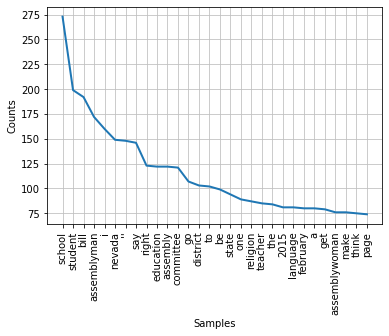

In [45]:
import matplotlib.pyplot as plt
textdist.plot(30,cumulative=False)
plt.show()